In [3]:
import numpy as np
from umap import UMAP
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import defaultdict
import os
from sklearn.decomposition import PCA
import scipy
import random
from datetime import datetime
random.seed(8)

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import sys

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [5]:
from data.pdb_utils import VOCAB
from openTSNE import TSNE

# Graph embedding of CSD and BioLiP
To see if they occupy different areas of the latent space

## Do different subsets of QBioLIP occupy different areas of the latent space?

In [8]:
embedding_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings1"
out_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_umap1"

graph_embedding_files = {
    # "BioLiP": f"{embedding_dir1}/data_pretrained/graph_embeddings.npy",
    "PDNA": f"{embedding_dir}/PDNA/graph_embeddings.npy",
    "Pion": f"{embedding_dir}/Pion/graph_embeddings.npy",
    "PP": f"{embedding_dir}/PP/graph_embeddings.npy",
    "Ppeptide": f"{embedding_dir}/Ppeptide/graph_embeddings.npy",
    "RNAL": f"{embedding_dir}/RNAL/graph_embeddings.npy",
    "PRNA": f"{embedding_dir}/PRNA/graph_embeddings.npy",
    "PL": f"{embedding_dir}/PL/graph_embeddings.npy",
    "CSD": f"{embedding_dir}/CSD/graph_embeddings.npy"
}

source = []
embeddings = []
for key, file in graph_embedding_files.items():
    with open(file, "rb") as f:
        embeddings1 = np.load(f)
    embeddings.append(embeddings1)
    source = source + [key] * embeddings1.shape[0]

embeddings = np.concatenate(embeddings, axis=0)

# n_neighbors = 20
# min_dist = 0.1
# umap_2d = UMAP(
#     n_components=2,
#     n_neighbors=n_neighbors,
#     min_dist=min_dist,
#     init="random",
#     random_state=0,
# )
# proj_2d_graph = umap_2d.fit_transform(embeddings)

tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)
proj_2d_graph = tsne.fit(embeddings)

df = pd.DataFrame(columns=["x", "y", "source"])
df["x"] = proj_2d_graph[:, 0]
df["y"] = proj_2d_graph[:, 1]
df["source"] = source
os.makedirs(out_dir, exist_ok=True)
df.to_csv(f"{out_dir}/graph_embedding_2d_all_modalities.csv", index=False)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 4.26 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.40 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.10 seconds
===> Running optimization with exaggeration=12.00, lr=452.75 for 250 iterations...
Iteration   50, KL divergence 3.6798, 50 iterations in 14.5066 sec
Iteration  100, KL divergence 3.6788, 50 iterations in 13.4030 sec
Iteration  150, KL divergence 3.6677, 50 iterations in 13.3241 sec
Iteration  200, KL divergence 3.6639, 50 iterations in 13.8196 sec
Iteration  250, KL divergence 3.6622, 50 iterations in 20.5347 sec
   --> Time elapsed: 75.59 seconds
===> Running optimization with exaggerat

In [1]:
color_dict = {
    "PDNA": "#FF5733",  # Red
    "Pion": "#3BB143",  # Green
    "PP": "#3357FF",    # Blue
    "Ppeptide": "#F033FF",  # Magenta
    "RNAL": "#FFC300",  # Yellow
    "PRNA": "#581845",  # Purple
    "PL": "#C70039",    # Maroon
    "CSD": "#FFC0CB"    # Pink
}

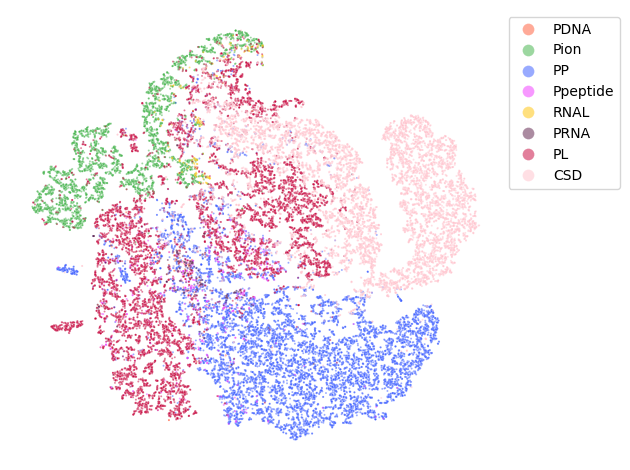

In [5]:
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_tsne_all/graph_embedding_2d_all_modalities_perplexity_30.csv", "r") as f:
    df = pd.read_csv(f)

ax = sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="source",
    palette=color_dict,
    alpha=0.5,
    s=2,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.legend(markerscale=4)
current_date = datetime.now()
formatted_date = current_date.strftime('%Y%m%d')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), markerscale=6)
plt.tight_layout()
# plt.savefig(f"figs/graph_embeddings_{formatted_date}.png", dpi=300)
plt.show()

In [18]:
color_dict = {
    "PDNA": "#FF5733",  # Red
    "Pion": "#3BB143",  # Green
    "PP": "#3357FF",    # Blue
    "Ppeptide": "#F033FF",  # Magenta
    "RNAL": "#FFC300",  # Yellow
    "PRNA": "#581845",  # Purple
    "PL": "#C70039",    # Maroon
    "CSD": "#FFC0CB"    # Pink
}

select_key = "Ppeptide"
new_color_dict = {}
for key in color_dict:
    if key == select_key:
        new_color_dict[key] = color_dict[key]
    else:
        new_color_dict[key] = "#808080"
color_dict = new_color_dict
color_dict

{'PDNA': '#808080',
 'Pion': '#808080',
 'PP': '#808080',
 'Ppeptide': '#F033FF',
 'RNAL': '#808080',
 'PRNA': '#808080',
 'PL': '#808080',
 'CSD': '#808080'}

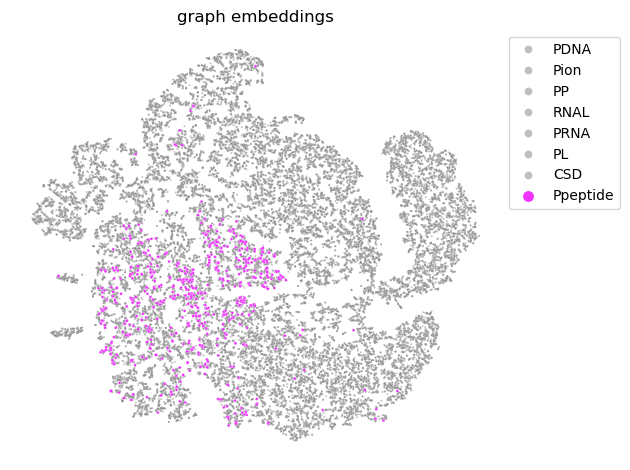

In [19]:
with open("/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_tsne_all/graph_embedding_2d_all_modalities_perplexity_30.csv", "r") as f:
    df = pd.read_csv(f)

ax = sns.scatterplot(
    data=df[df["source"] != select_key],
    x="x",
    y="y",
    hue="source",
    palette=color_dict,
    alpha=0.5,
    s=2,
)
ax = sns.scatterplot(
    data=df[df["source"] == select_key],
    x="x",
    y="y",
    hue="source",
    palette=color_dict,
    alpha=1,
    s=4,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.title("graph embeddings")
plt.legend(markerscale=4)
current_date = datetime.now()
formatted_date = current_date.strftime('%Y%m%d')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), markerscale=4)
plt.tight_layout()
plt.savefig(f"figs/graph_embeddings_{select_key}_{formatted_date}.png", dpi=300)
plt.show()

/n/home13/afang/.conda/envs/interactenv1/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


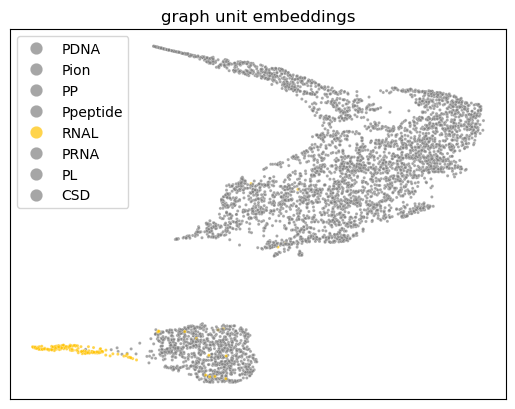

In [17]:
embedding_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings"
out_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_umap"

graph_embedding_files = {
    # "BioLiP": f"{embedding_dir1}/data_pretrained/graph_unit_embeddings.npy",
    "PDNA": f"{embedding_dir}/PDNA/graph_unit_embeddings.npy",
    "Pion": f"{embedding_dir}/Pion/graph_unit_embeddings.npy",
    "PP": f"{embedding_dir}/PP/graph_unit_embeddings.npy",
    "Ppeptide": f"{embedding_dir}/Ppeptide/graph_unit_embeddings.npy",
    "RNAL": f"{embedding_dir}/RNAL/graph_unit_embeddings.npy",
    "PRNA": f"{embedding_dir}/PRNA/graph_unit_embeddings.npy",
    "PL": f"{embedding_dir}/PL/graph_unit_embeddings.npy",
    "CSD": f"{embedding_dir}/CSD/graph_unit_embeddings.npy"
}

source = []
embeddings = []
for key, file in graph_embedding_files.items():
    with open(file, "rb") as f:
        embeddings1 = np.load(f)
    embeddings.append(embeddings1)
    source = source + [key] * embeddings1.shape[0]

embeddings = np.concatenate(embeddings, axis=0)

n_neighbors = 20
min_dist = 0.1
umap_2d = UMAP(
    n_components=2,
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    init="random",
    random_state=0,
)
proj_2d_graph = umap_2d.fit_transform(embeddings)
df = pd.DataFrame(columns=["x", "y", "source"])
df["x"] = proj_2d_graph[:, 0]
df["y"] = proj_2d_graph[:, 1]
df["source"] = source
df.to_csv(f"{out_dir}/graph_unit_embedding_2d_all_modalities.csv", index=False)

ax = sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="source",
    palette=color_dict,
    alpha=0.7,
    s=5,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.title("graph unit embeddings")
plt.legend(markerscale=4)
plt.show()

In [12]:
# Get pairwise distances between different subsets of embeddings
import itertools
distances = {}
pairs = list(itertools.combinations(graph_embedding_files.keys(), 2))
for pair in pairs:
    f1, f2 = pair
    if (f2, f1) in distances:
        continue
    with open(graph_embedding_files[f1], "rb") as f:
        embeddings1 = np.load(f)
    with open(graph_embedding_files[f2], "rb") as f:
        embeddings2 = np.load(f)
    embed1 = embeddings1.mean(axis=0)
    embed2 = embeddings2.mean(axis=0)
    distances[pair] = np.linalg.norm(embed1 - embed2)

In [13]:
sorted(distances.items(), key=lambda x: x[1], reverse=False)

[(('PL', 'CSD'), 0.20387326),
 (('PDNA', 'Ppeptide'), 0.24554604),
 (('PDNA', 'PP'), 0.26975203),
 (('PP', 'Ppeptide'), 0.42556855),
 (('PRNA', 'PL'), 0.44093487),
 (('Ppeptide', 'PL'), 0.46854466),
 (('Ppeptide', 'PRNA'), 0.49707267),
 (('Ppeptide', 'CSD'), 0.51112777),
 (('PDNA', 'PRNA'), 0.601731),
 (('PRNA', 'CSD'), 0.6178748),
 (('Pion', 'RNAL'), 0.62927395),
 (('PDNA', 'PL'), 0.68737954),
 (('PDNA', 'CSD'), 0.73240066),
 (('RNAL', 'PL'), 0.7452588),
 (('RNAL', 'PRNA'), 0.749947),
 (('PP', 'CSD'), 0.83421385),
 (('PP', 'PRNA'), 0.84386224),
 (('PP', 'PL'), 0.8466456),
 (('RNAL', 'CSD'), 0.8489996),
 (('Pion', 'PL'), 1.0160879),
 (('Pion', 'CSD'), 1.037383),
 (('Ppeptide', 'RNAL'), 1.1121596),
 (('Pion', 'PRNA'), 1.1515565),
 (('PDNA', 'RNAL'), 1.2729353),
 (('Pion', 'Ppeptide'), 1.3964807),
 (('PP', 'RNAL'), 1.4559821),
 (('PDNA', 'Pion'), 1.5471841),
 (('Pion', 'PP'), 1.657155)]

# Atom embeddings

In [23]:
embedding_dir1 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings/BioLiP"
embedding_dir2 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings/CSD"

In [24]:
element_type = {
    'H': 'Nonmetal',
    'B': 'Metalloid',
    'C': 'Nonmetal',
    'N': 'Nonmetal',
    'O': 'Nonmetal',
    'F': 'Halogen',
    'Mg': 'Alkaline earth metal',
    'Al': 'Post-transition metal',
    'P': 'Nonmetal',
    'S': 'Nonmetal',
    'Cl': 'Halogen',
    'Ca': 'Alkaline earth metal',
    'V': 'Transition metal',
    'Mn': 'Transition metal',
    'Fe': 'Transition metal',
    'Co': 'Transition metal',
    'Se': 'Nonmetal',
    'Br': 'Halogen',
    'Y': 'Transition metal',
    'Mo': 'Transition metal',
    'Ru': 'Transition metal',
    'Pd': 'Transition metal',
    'I': 'Halogen',
    'Xe': 'Noble gas',
    'Ta': 'Transition metal',
    'W': 'Transition metal',
    'Re': 'Transition metal',
    'Si': 'Metalloid',
    'As': 'Metalloid',
    'Te': 'Metalloid',
}

type_color = {
    'Nonmetal': '#FFD700',
    'Halogen': '#FF4500',
    'Alkali metal': '#8A2BE2',
    'Alkaline earth metal': '#00BFFF',
    'Transition metal': '#20B2AA',
    'Metalloid': '#7FFFD4',
    'Post-transition metal': '#B8860B',
    'Noble gas': '#6495ED',
}

In [25]:
with open(f"{embedding_dir1}/atom_id.npy", "rb") as f:
    atom_id1 = np.load(f)
with open(f"{embedding_dir1}/atom_embeddings.npy", "rb") as f:
    atom_embeddings1 = np.load(f)

atom_embeddings1 = atom_embeddings1[atom_id1 > 2]
atom_id1 = atom_id1[atom_id1 > 2]
atom_embeddings1 = atom_embeddings1[:, :atom_embeddings1.shape[1]//2]


# Unique group IDs
unique_atoms1 = np.unique(atom_id1)

# Initialize an empty list to store the mean of each group
group_means1 = []

# Iterate over each group and compute the mean
for group in unique_atoms1:
    group_mask = atom_id1 == group
    group_rows = atom_embeddings1[group_mask]
    group_mean = np.mean(group_rows, axis=0)
    group_means1.append(group_mean)

# Convert list of group means to a numpy array if needed
group_means_array1 = np.array(group_means1)

pca = PCA(n_components=2)
aa_pca1 = pca.fit_transform(group_means_array1)
df1 = pd.DataFrame(aa_pca1, columns=["x", "y"])
df1["atom_index"] = unique_atoms1

with open(f"{embedding_dir2}/atom_id.npy", "rb") as f:
    atom_id2 = np.load(f)
with open(f"{embedding_dir2}/atom_embeddings.npy", "rb") as f:
    atom_embeddings2 = np.load(f)

atom_embeddings2 = atom_embeddings2[atom_id2 > 2]
atom_id2 = atom_id2[atom_id2 > 2]
atom_embeddings2 = atom_embeddings2[:, :atom_embeddings2.shape[1]//2]


# Unique group IDs
unique_atoms2 = np.unique(atom_id2)

# Initialize an empty list to store the mean of each group
group_means2 = []

# Iterate over each group and compute the mean
for group in unique_atoms2:
    group_mask = atom_id2 == group
    group_rows = atom_embeddings2[group_mask]
    group_mean = np.mean(group_rows, axis=0)
    group_means2.append(group_mean)

# Convert list of group means to a numpy array if needed
group_means_array2 = np.array(group_means2)

pca = PCA(n_components=2)
aa_pca2 = pca.fit_transform(group_means_array2)
df2 = pd.DataFrame(aa_pca2, columns=["x", "y"])
df2["atom_index"] = unique_atoms2


df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
df["source"] = ["BioLiP"] * aa_pca1.shape[0] + ["CSD"] * aa_pca2.shape[0]
df["element"] = [VOCAB.idx_to_atom(i) for i in df["atom_index"]]
df["type"] = [element_type.get(VOCAB.idx_to_atom(i), "unknown") for i in df["atom_index"]]

In [26]:
df

,x,y,atom_index,source,element,type
0,-0.126084,0.115467,3,BioLiP,H,Nonmetal
1,-0.217079,0.025299,7,BioLiP,B,Metalloid
2,0.497973,-0.203245,8,BioLiP,C,Nonmetal
3,0.438601,-0.244283,9,BioLiP,N,Nonmetal
4,0.484173,-0.069682,10,BioLiP,O,Nonmetal
5,0.280489,0.376497,11,BioLiP,F,Halogen
6,0.345325,-0.346537,14,BioLiP,Mg,Alkaline earth metal
7,-0.417429,-0.082140,15,BioLiP,Al,Post-transition metal
8,0.260256,-0.182666,17,BioLiP,P,Nonmetal
9,0.395012,0.136485,18,BioLiP,S,Nonmetal


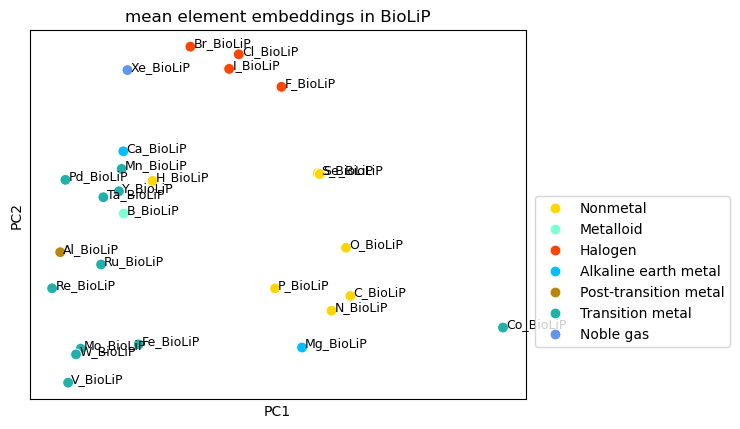

In [27]:
plot_df = df[df["source"] == "BioLiP"]
plot_df = plot_df.reset_index(drop=True)
ax = sns.scatterplot(
    data=plot_df,
    x="x",
    y="y",
    hue="type",
    alpha=1,
    s=60,
    palette=type_color,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
for i in range(len(plot_df['x'])):
    plt.text(plot_df['x'][i] + 0.01,  # X position, with a slight offset to avoid overlapping the point
             plot_df['y'][i],       # Y position
             plot_df["element"][i] + "_" + plot_df["source"][i],  # Text label
             fontsize=9)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc="upper left", borderaxespad=0)
plt.title("mean element embeddings in BioLiP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

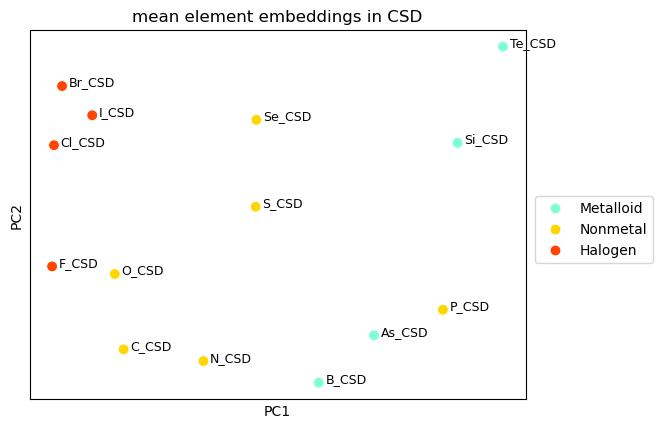

In [28]:
plot_df = df[df["source"] == "CSD"]
plot_df = plot_df.reset_index(drop=True)
ax = sns.scatterplot(
    data=plot_df,
    x="x",
    y="y",
    hue="type",
    alpha=1,
    s=60,
    palette=type_color,
)
ax.set(xlabel=None)
ax.set(ylabel=None)
for i in range(len(plot_df['x'])):
    plt.text(plot_df['x'][i] + 0.01,  # X position, with a slight offset to avoid overlapping the point
             plot_df['y'][i],       # Y position
             plot_df["element"][i] + "_" + plot_df["source"][i],  # Text label
             fontsize=9)

plt.xticks(visible=False)
plt.yticks(visible=False)
plt.tick_params(axis="both", which="both", length=0)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc="upper left", borderaxespad=0)
plt.title("mean element embeddings in CSD")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## How different are the embeddings of the same atom in different datasets

In [29]:
common_atoms = set(unique_atoms1).intersection(set(unique_atoms2))

In [31]:
with open(f"{embedding_dir1}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)

value_counts = np.unique(atom_id, return_counts=True)
value_counts = dict(zip([VOCAB.idx_to_atom(i) for i in value_counts[0]], value_counts[1]))
value_counts

{'g': 4000,
 'H': 8,
 'B': 4,
 'C': 305474,
 'N': 76323,
 'O': 89297,
 'F': 44,
 'Mg': 362,
 'Al': 1,
 'P': 1202,
 'S': 2958,
 'Cl': 37,
 'Ca': 1,
 'V': 1,
 'Mn': 4,
 'Fe': 258,
 'Co': 2,
 'Se': 51,
 'Br': 43,
 'Y': 1,
 'Mo': 1,
 'Ru': 3,
 'Pd': 1,
 'I': 8,
 'Xe': 2,
 'Ta': 18,
 'W': 2,
 'Re': 2}

In [33]:
with open(f"{embedding_dir2}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)

value_counts = np.unique(atom_id, return_counts=True)
value_counts = dict(zip([VOCAB.idx_to_atom(i) for i in value_counts[0]], value_counts[1]))
value_counts

{'g': 4000,
 'B': 356,
 'C': 78247,
 'N': 7215,
 'O': 10860,
 'F': 2381,
 'Si': 161,
 'P': 245,
 'S': 1397,
 'Cl': 708,
 'As': 20,
 'Se': 104,
 'Br': 333,
 'Te': 6,
 'I': 82}

In [34]:
atom_id1.shape

(476108,)

In [35]:
atom_embeddings1.shape

(476108, 40)

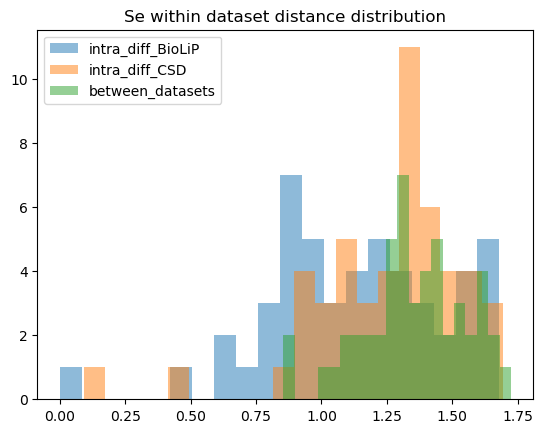

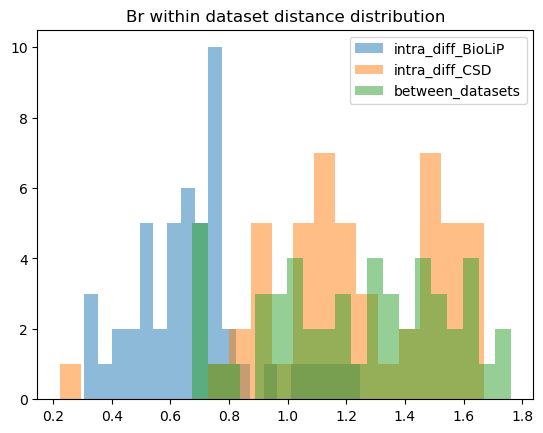

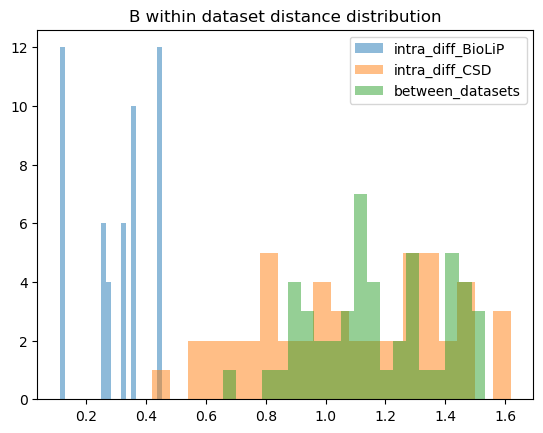

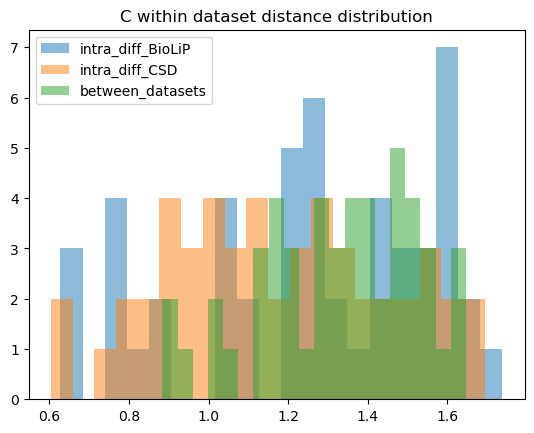

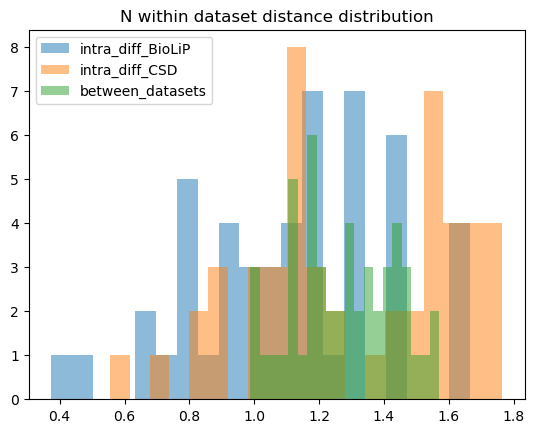

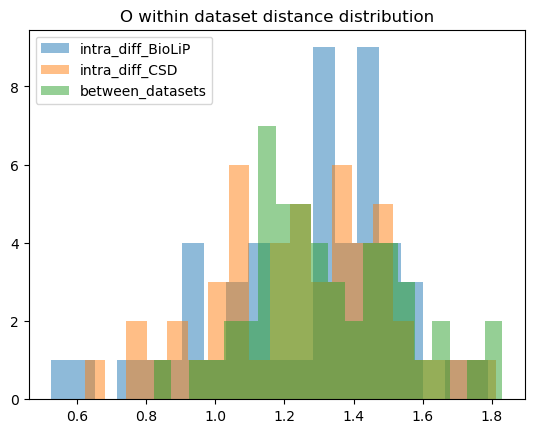

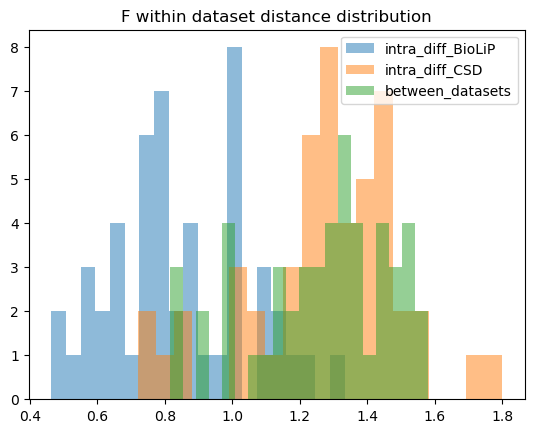

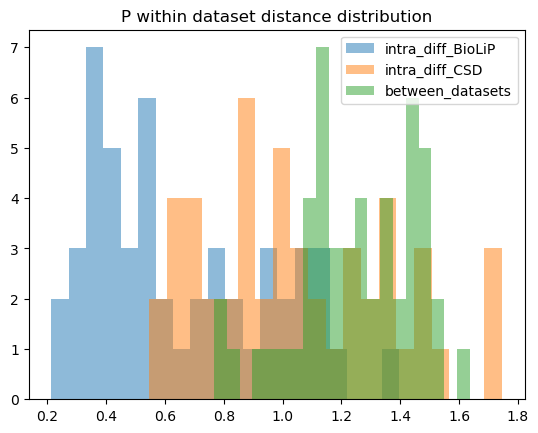

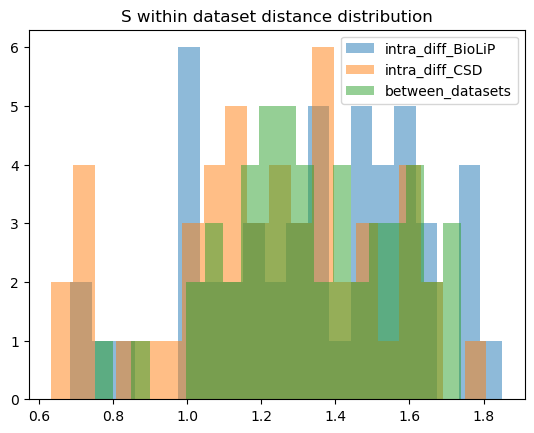

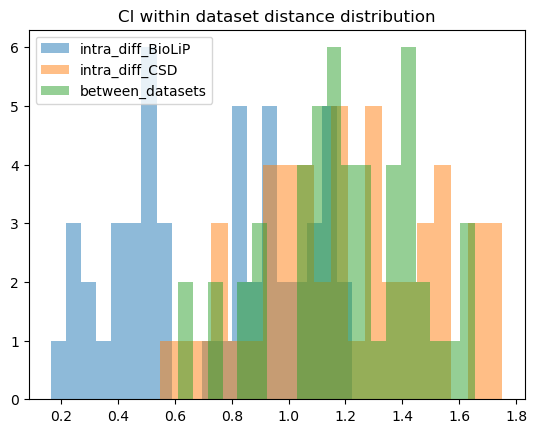

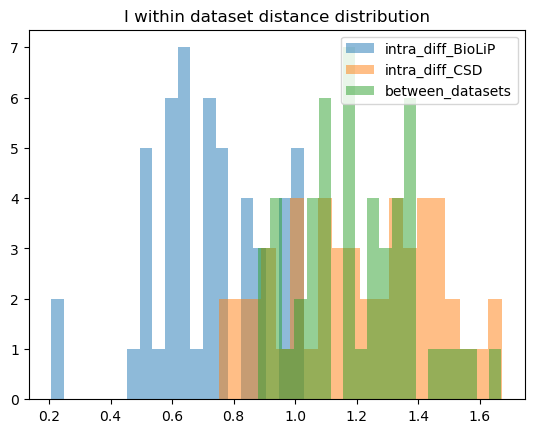

,element,distance_between_means,diff_to_BioLIP_statistic,diff_to_BioLIP_pvalue,diff_to_CSD_statistic,diff_to_CSD_pvalue
0,Se,0.486303,0.40,5.822569e-04,0.20,0.271914
1,Br,0.635797,0.74,1.409545e-13,0.14,0.716647
2,B,0.804112,1.00,1.982331e-29,0.26,0.067795
3,C,0.267058,0.18,3.959399e-01,0.36,0.002835
4,N,0.348496,0.36,2.834981e-03,0.34,0.005842
5,O,0.252426,0.18,3.959399e-01,0.22,0.178587
6,F,0.673347,0.72,8.759313e-13,0.08,0.997711
7,P,0.786526,0.76,2.082282e-14,0.46,0.000038
8,S,0.398450,0.18,3.959399e-01,0.24,0.112385
9,Cl,0.611956,0.62,2.623448e-09,0.20,0.271914


In [37]:
rows = []
num_pairs = 50
for element in common_atoms:
    idx1 = np.where(unique_atoms1 == element)[0][0]
    idx2 = np.where(unique_atoms2 == element)[0][0]

    dist = np.linalg.norm(group_means_array1[idx1] - group_means_array2[idx2])

    idxs1 = sorted(list(np.where(atom_id1 == element)[0]))
    idxs2 = sorted(list(np.where(atom_id2 == element)[0]))
    intra_samples1 = [random.sample(idxs1, 2) for _ in range(num_pairs)]
    intra_samples2 = [random.sample(idxs2, 2) for _ in range(num_pairs)]
    inter_samples = [random.sample(idxs1, 1) + random.sample(idxs2, 1) for _ in range(num_pairs)]
    intra_diff1 = [np.linalg.norm(atom_embeddings1[sample[0]] - atom_embeddings1[sample[1]]) for sample in intra_samples1]
    intra_diff2 = [np.linalg.norm(atom_embeddings2[sample[0]] - atom_embeddings2[sample[1]]) for sample in intra_samples2]
    inter_diff = [np.linalg.norm(atom_embeddings1[sample[0]] - atom_embeddings2[sample[1]]) for sample in inter_samples]
    plt.hist(intra_diff1, bins=20, alpha=0.5, label='intra_diff_BioLiP')
    plt.hist(intra_diff2, bins=20, alpha=0.5, label='intra_diff_CSD')
    plt.hist(inter_diff, bins=20, alpha=0.5, label='between_datasets')
    plt.title(f"{VOCAB.idx_to_atom(element)} within dataset distance distribution")
    plt.legend()
    plt.show()
    diff_1 = scipy.stats.ks_2samp(sorted(intra_diff1), sorted(inter_diff))
    diff_2 = scipy.stats.ks_2samp(sorted(intra_diff2), sorted(inter_diff))
    rows.append([VOCAB.idx_to_atom(element), dist, diff_1.statistic, diff_1.pvalue, diff_2.statistic, diff_2.pvalue])

diff_df = pd.DataFrame(rows, columns=["element", "distance_between_means", "diff_to_BioLIP_statistic", "diff_to_BioLIP_pvalue", "diff_to_CSD_statistic", "diff_to_CSD_pvalue"])
diff_df
